## Python for Data Analysis Chapter4

Numpy는 데이터 복사가 일어나지 않음
필요시 copy 함수를 사용

In [3]:
import numpy as np

In [4]:
names = np.array(['bob','joe','will','bob','will','joe','joe'])
data = np.random.randn(7,4)

In [5]:
names

array(['bob', 'joe', 'will', 'bob', 'will', 'joe', 'joe'], dtype='<U4')

In [6]:
data

array([[ 0.48807425,  0.06964859,  0.93354676,  0.28645336],
       [-0.52169604,  0.14166629, -0.66802606,  0.46526798],
       [ 0.16177528, -1.14594164, -1.1702327 , -0.84126833],
       [-0.43743208, -1.09350099,  0.83014871,  1.14526818],
       [-0.22689987,  0.4771197 , -0.04987155, -0.27591976],
       [-0.88077143, -1.69725615,  0.26834178,  1.71463735],
       [ 0.88938694, -0.6729976 ,  0.92605861, -0.04880791]])

In [7]:
data[names=='bob']

array([[ 0.48807425,  0.06964859,  0.93354676,  0.28645336],
       [-0.43743208, -1.09350099,  0.83014871,  1.14526818]])

In [8]:
data[names == 'bob',2:]

array([[0.93354676, 0.28645336],
       [0.83014871, 1.14526818]])

In [9]:
names != 'bob'

array([False,  True,  True, False,  True,  True,  True])

일반적인 조건을 반대로 쓰고 싶을 떄 ~

In [10]:
cond = names == 'bob'
data[~cond]

array([[-0.52169604,  0.14166629, -0.66802606,  0.46526798],
       [ 0.16177528, -1.14594164, -1.1702327 , -0.84126833],
       [-0.22689987,  0.4771197 , -0.04987155, -0.27591976],
       [-0.88077143, -1.69725615,  0.26834178,  1.71463735],
       [ 0.88938694, -0.6729976 ,  0.92605861, -0.04880791]])

In [11]:
mask = (names == 'bob') | (names == 'will')

In [12]:
mask

array([ True, False,  True,  True,  True, False, False])

2차원 데이터에 대한 연산은 pandas 를 이용하는 것이 편리

배열 전치와 축 바꾸기

In [13]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [14]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [15]:
np.dot(arr.T,arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

유니버셜 함수 : 배열의 각 원소를 빠르게 처리하는 함수

In [16]:
np.where(arr>5,2,-2)

array([[-2, -2, -2, -2, -2],
       [-2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2]])

np.sort 메서드는 배열을 직접 변경하지 않고 정렬된 결과를 가진 복사본을 반환

배열 데이터의 파일 입출력

In [17]:
arr = np.arange(10)

In [18]:
np.save('some_array',arr)

In [19]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### @ 기호는 행렬곱셈을 수행하는 연산

난수생성

In [24]:
samples = np.random.normal(size=(4,4))

In [25]:
samples

array([[-0.97099361, -0.88051261,  0.39946428, -0.21762347],
       [-0.47114852, -0.26374328,  0.74602415, -0.1674166 ],
       [-0.71993608, -0.68250887,  0.28357631, -0.52021407],
       [-0.06575156,  1.80069487,  1.50893529, -0.80685926]])

In [26]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

In [28]:
import matplotlib.pyplot as plt

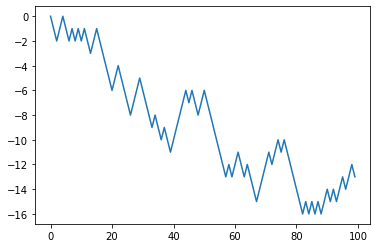

In [29]:
plt.plot(walk[:100])

In [30]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(1)

In [31]:
walks

array([[  1,   2,   1, ...,   4,   5,   6],
       [ -1,  -2,  -3, ...,  38,  37,  36],
       [  1,   0,   1, ..., -16, -17, -16],
       ...,
       [  1,   0,  -1, ..., -24, -25, -24],
       [ -1,   0,  -1, ...,   4,   3,   4],
       [  1,   0,   1, ...,   0,   1,   0]], dtype=int32)

## Python for Data Analysis Chapter4

### pandas 시작하기

In [32]:
import pandas as pd

In [34]:
obj2 = pd.Series([4,7,-5,3], index = ['d','b','a','c'])

In [35]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [36]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [38]:
sdata = {'ohio':35000,'texas':71000,'oregon':16000,'utah':5000}

In [39]:
obj3 = pd.Series(sdata)

In [41]:
obj3

ohio      35000
texas     71000
oregon    16000
utah       5000
dtype: int64

In [48]:
states = ['california','ohio','oregon','texas']

In [49]:
obj4 = pd.Series(sdata, index=states)

In [50]:
obj4

california        NaN
ohio          35000.0
oregon        16000.0
texas         71000.0
dtype: float64

In [53]:
obj4.isnull()

california     True
ohio          False
oregon        False
texas         False
dtype: bool

del 예약어를 이용하여 데이터 프레임의 컬럼 삭제

파이썬의 집합과 달리 pandas의 인덱스는 중복된 값을 허용한다.

재색인 reindex

하나의 로우나 컬럼 삭제하기 drop

In [55]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))

In [56]:
df2.loc[1,'b'] = np.nan

In [57]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [58]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [59]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [60]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0
